## Voronoi diagram using Scikit-learn

This implementation uses Scikit-learn to build a 1-nearest neighbour model that, given a 2D space with N points, decomposes the space into N regions based on proximity to each point.

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%config InlineBackend.figure_format="retina"

In [2]:
# set random seed
seed = 1
np.random.seed(seed)

# set cmap
cmap = "tab10"

In [3]:
# generate N points, each belonging to a different class
N = 100
X, y = make_blobs(n_samples=N, centers=N, n_features=2, 
                  cluster_std=3.0, random_state=seed)

print("X:", X.shape)
print("y:", y.shape)

X: (100, 2)
y: (100,)


In [4]:
# fit 1-nearest neighbour model
voronoi = KNeighborsClassifier(n_neighbors=1)
voronoi = voronoi.fit(X, y)

In [5]:
# generate 2D grid
pad = 1
resolution = 100

# grid limits
min_x1, max_x1 = np.min(X[:, 0]) - pad, np.max(X[:, 0]) + pad
min_x2, max_x2 = np.min(X[:, 1]) - pad, np.max(X[:, 1]) + pad

# generate meshgrid
xx, yy = np.meshgrid(
    np.linspace(min_x1, max_x1, resolution),
    np.linspace(min_x2, max_x2, resolution)
)

# build grid points
grid_points = np.c_[xx.ravel(), yy.ravel()] # shape: (resolution*resolution, 2)

In [6]:
# get model's predictions for grid
grid_predictions = voronoi.predict(grid_points)
print("grid_predictions:", grid_predictions.shape)

grid_predictions: (10000,)


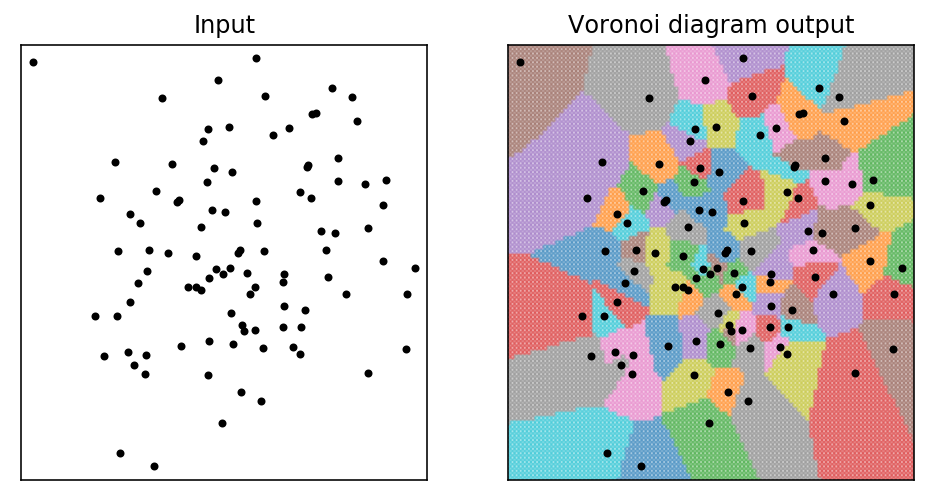

In [7]:
# plot Voronoi diagram
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# set specifications
for ax in axes:
    ax.set_xlim([min_x1, max_x1])
    ax.set_ylim([min_x2, max_x2])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

# plot input points
axes[0].scatter(X[:, 0], X[:, 1], c="black", marker=".")
axes[0].set_title("Input")

# plot Voronoi tessellation
axes[1].scatter(grid_points[:, 0], grid_points[:, 1], c=grid_predictions, cmap=cmap, alpha=0.4, s=4)
axes[1].scatter(X[:, 0], X[:, 1], c="black", marker=".")
axes[1].set_title("Voronoi diagram output")

plt.show()